# Local Phase Image Quantum Encoding (LPIQUE) #
## First experiment: image encoding - reconstruction ##
In this experiment we will check how the reconstructed image differs from the original one. Hence, we make following steps:
1. Generate an artificial image that has the same intensities of pixels.
2. Encode the image using quantum backend (simulator or real quantum computer).
3. Reconstruct an image.
4. Show the original and reconstructed images together with the image of absolute difference between them, which will show us the quantum errors influence on the encoded image.
5. Compute the basic statistics of the difference image.
We will call this experiment ER experiment, shortly.

First we have to import all library needed:

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imshow, show
from LPQIE.src.LPIQE_reconstruction_executor import  LpiqeReconstructionExecutor as recon
from LPQIE.src.LPIQE_qiskit_implementation import  LpiqeQiskit

### Generating an artificial image ###
We create $16 \times 16$ image with pixels intensities equal to 100. At the end we divide whole image by 255 to obtain the desired range $[0,1]$. Certainly, we could create the image with intensity 0.39215; however, in case of real images we will read them in the $[0,255]$ format. Therefore, we show here explicitly, that image must be converted to $[0,1]$ format before it is encoded by LPIQE method.

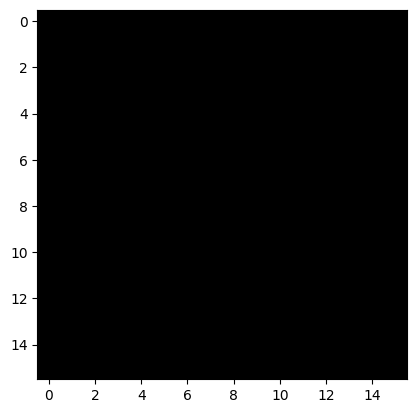

In [11]:
img=np.full((16,16), 100, np.uint8)/255
plt.imshow(img, cmap='gray')
plt.show()

### Encoding image with quantum backend ###
Now, we use the library prepared for the ER experiment, `LpiqeReconstructionExecutor`, which is already imported in the first code cell and is seen under the alias `recon`.
We use the implementation `LpiqeQiskit` of an interface `ILpqieImplementation` made for Qiskit library and availing to use LPIQE method on IMB-Q quantum backends. How to create such an implementation is shown in separate tutorial.
`LpiqeReconstructionExecutor` has:
 - constructor with parameters:
    - concrete executor that implements interface `ILpqieImplementation`
    - image size, that width and height must be the power of two.
    - parameters for loging, that is a list which content depends on concrete implementation. In our case (Qiskit backends) the parameters are
        - bool field informing if we want to save new IBM account or use the already saved.
        - account TOKEN, that can be obtained from IBM Q web system.
        - provider info: hub
        - provider info: group
        - provider info: project
        - backend
   and
 - a method `execute(self, image: np.ndarray, shots)`, where the parameters are:
    - image that will be encoded and reconstructed
    - the number of shots that should be made
 Hence, we create the following code:

Quantum computation started: 
1. Transpilation started...
   Circuit is transpiled.
2. Preparing a job.
   Job is prepared.
3. Sending job to execution
  Job is executed


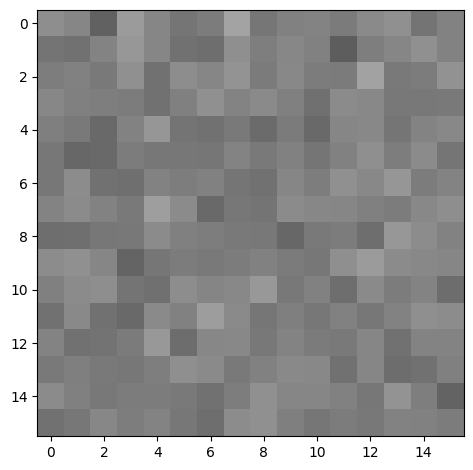

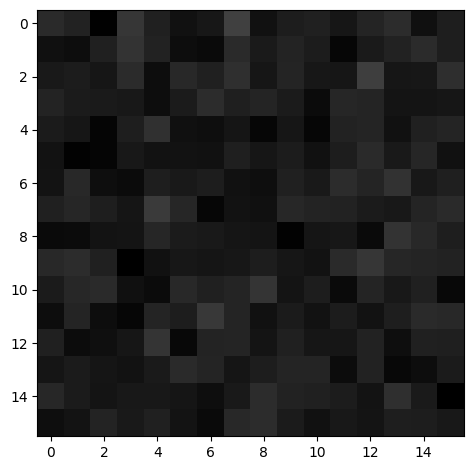

In [12]:
lpique_impl=LpiqeQiskit()
executor=recon(lpique_impl, (16, 16), [True, '6a780c166609fa9e4de81bb085725b615135a37caf29e4fff82e9d3e3ba864662469ab94fcaa8165e03318df4aa3887b98799b46b7d5979941524a767a9c0f3b', 'ibm-q-psnc', 'internal', 'default', 'simulator_statevector'])
executor.execute(img, 100000)
imshow(executor.reconstructed_image, cmap='gray')
show()
imshow(executor.difference_image, cmap='gray')
show()